# PROJETO 1 - ANALISE DE ALGORITMO

In [1]:
using Plots
using Statistics
using BenchmarkTools

## VECTOR GENERATOR - SIZE(N & Q)

In [2]:
# Function to generate a vector of random values
function generate_vectors(size::Int, upper_limit::Int)
    return rand(1:upper_limit, size)
end

generate_vectors (generic function with 1 method)

In [3]:
# Function to generate a random key
function generate_keys(size::Int, upper_limit::Int)
    return rand(1:upper_limit, size)
end

generate_keys (generic function with 1 method)

## SEARCH FUNTIONS

In [4]:
# Simple linear search function
function simple_search(vector::Vector{Int64}, key::Int64)
    for i in 1:length(vector)
        if key == vector[i] 
            return i  # Returns the index where the key was found
        end
    end
    return -1  # Returns -1 if the key is not found
end

simple_search (generic function with 1 method)

In [5]:
# Optimized linear search function
function optimized_search(vector::Vector{Int64}, key::Int64)
    for i in 1:length(vector)
        if key == vector[i]
            return i  # Returns the index where the key was found
        elseif key < vector[i]
            return -1  # Returns -1 if the key is not found
        end
    end
    return -1  # Returns -1 if the key is not found
end

optimized_search (generic function with 1 method)

In [6]:
# Binary search function
function binary_search(vector::Vector{Int64}, key::Int64)
    low = 1
    high = length(vector)

    while low <= high
        mid = (low + high) ÷ 2
        if vector[mid] == key
            return mid  # Returns the index where the key was found
        elseif vector[mid] < key
            low = mid + 1
        else
            high = mid - 1
        end
    end
    return -1  # Returns -1 if the key is not found
end

binary_search (generic function with 1 method)

## MAIN - BENCHMARK AND PLOTS

In [7]:
# VARS
upper_limit = 1000 # Upper limit for generating random numbers
n_values = [10^4, 10^5, 10^6, 10^7]  # Vectors Sizes
q_values = [10^2, 10^3, 10^4, 10^5]  # Amount of Keys

# Initialize the list of vectors and keys
vector_list = [generate_vectors(n, upper_limit) for n in n_values]
key_list = [generate_keys(q, upper_limit) for q in q_values]

# Initialize the list of timers
time_simple_search = Matrix{Float64}(undef, length(n_values), length(q_values))
time_optimized_search = Matrix{Float64}(undef, length(n_values), length(q_values))
time_binary_search = Matrix{Float64}(undef, length(n_values), length(q_values))
time_to_sort = Vector{Float64}(undef, length(n_values))

4-element Vector{Float64}:
 4.0e-323
 1.3726586918366e-311
 1.37265114279e-311
 1.372651138237e-311

In [8]:
# Simple linear search - Benchmarking
for i in 1:length(n_values)  # For each vector size
    for j in 1:length(q_values)  # For each key numbers
        initial_time = time_ns()
        for key in key_list[j]
            simple_search(vector_list[i], key)
        end
        final_time = time_ns()
        time_simple_search[i, j] = (final_time - initial_time) / 1e6
    end
end

In [9]:
# Sorting the vectors - Benchmarking
for i in 1:length(n_values)   # For each vector size
    initial_time = time_ns()
    vector_list[i] = sort(vector_list[i])  # Sort the vectors
    final_time = time_ns()
    time_to_sort[i] = (final_time - initial_time) / 1e6 
end

In [10]:
# Optimized Linear search - Benchmarking
for i in 1:length(n_values)   # For each vector size
    for j in 1:length(q_values)  # For each key numbers
        initial_time = time_ns()
        for key in key_list[j]
            optimized_search(vector_list[i], key)
        end
        final_time = time_ns()
        time_optimized_search[i, j] = (final_time - initial_time) / 1e6
    end
end

In [11]:
# Binary search - Benchmarking
for i in 1:length(n_values)   # For each vector size
    for j in 1:length(q_values)  # For each key numbers
        initial_time = time_ns()
        for key in key_list[j]
            binary_search(vector_list[i], key)
        end
        final_time = time_ns()
        time_binary_search[i, j] = (final_time - initial_time) / 1e6
    end
end

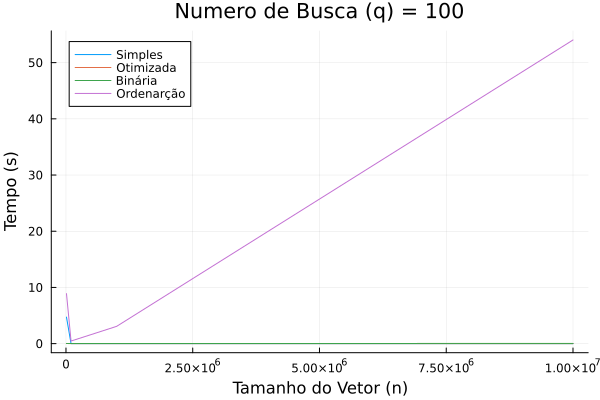

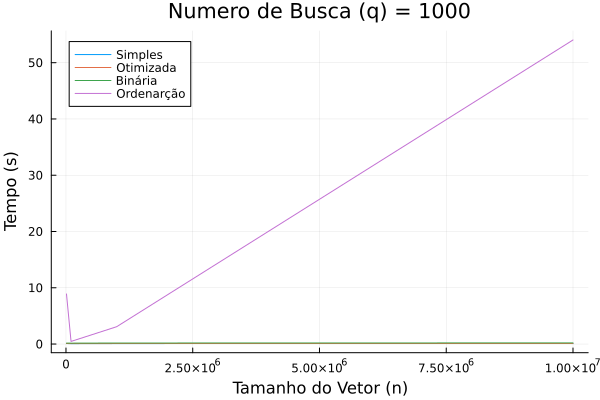

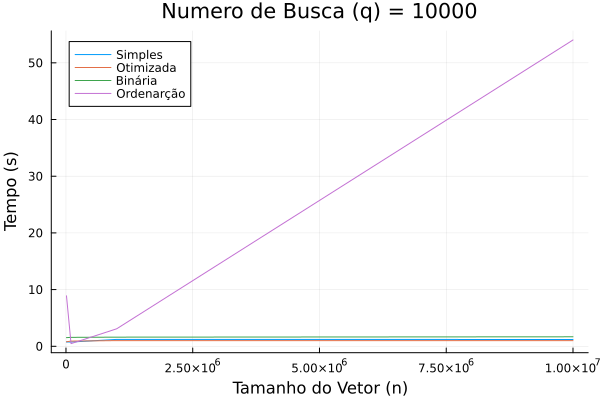

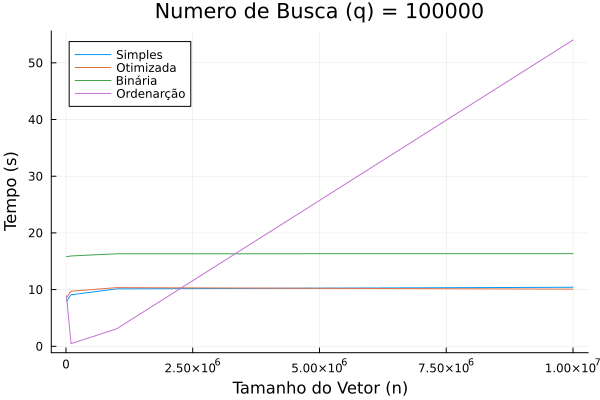

In [12]:
# Ploting graphics
for j in 1:length(q_values)
    p = plot(
        n_values,
        time_simple_search[:, j],
        label = "Simples",
        xlabel = "Tamanho do Vetor (n)",
        ylabel = "Tempo (s)",
        title = "Numero de Busca (q) = $(q_values[j])",
        legend = :topleft,
    )
    plot!(n_values, time_optimized_search[:, j], label = "Otimizada")
    plot!(n_values, time_binary_search[:, j], label = "Binária")
    plot!(n_values, time_to_sort, label = "Ordenarção")

    display(p)
    savefig(p, "../imgs/benchmark_q_$(q_values[j]).png")
end